<b>¡Hola Daniel!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!


In [1]:
 # Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
bold_start = '\033[1m'
bold_end = '\033[0m'

In [3]:
# Importar Dataframes
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [4]:
# Revisar estructura de los Dataframes
data_train.info(show_counts= True)
print()
print(f"{bold_start}El dataframe tiene este número de filas y columnas:{bold_end}")
data_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


(16860, 87)

<div class="alert alert-block alert-success"> <b>Celda [4]</b> <a class="tocSkip"></a><br> Excelente inclusión del método `.info()` para revisar la estructura del DataFrame. Has mostrado buena práctica al confirmar el número de filas y columnas junto con los tipos de datos. Esto facilita una visión clara del estado inicial de los datos. </div>

In [5]:
# Revisar la existencia de duplicados en todo el dataframe y si hay fechas y horas repetidas en la columna 'date'
print(f"{bold_start}Número de valores duplicados:{bold_end}",data_train.duplicated().sum())
print(f"{bold_start}Fechas únicas:{bold_end}",data_train['date'].nunique())

Número de valores duplicados: 0
Fechas únicas: 16860


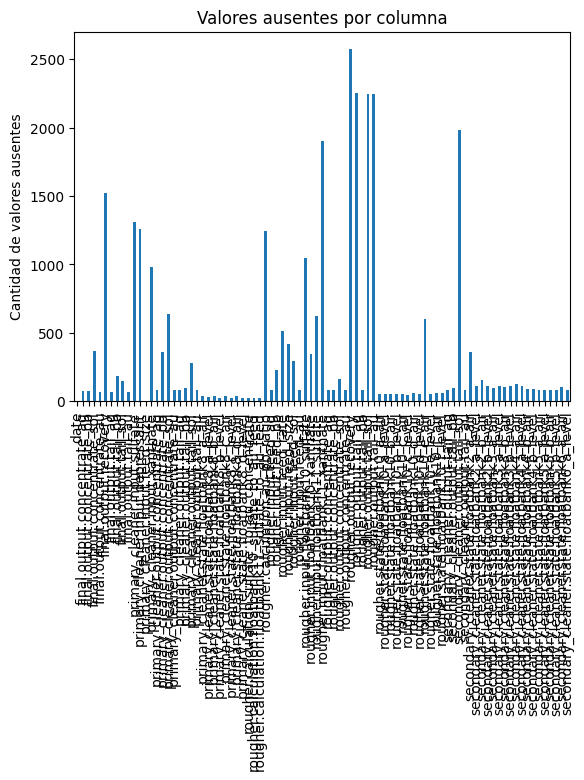


                                                    Missing_Count  \
rougher.output.recovery                                      2573   
rougher.output.tail_ag                                       2250   
rougher.output.tail_sol                                      2249   
rougher.output.tail_au                                       2249   
secondary_cleaner.output.tail_sol                            1986   
...                                                           ...   
primary_cleaner.state.floatbank8_d_level                       27   
rougher.calculation.floatbank10_sulfate_to_au_feed             27   
rougher.calculation.floatbank11_sulfate_to_au_feed             27   
primary_cleaner.input.feed_size                                 0   
date                                                            0   

                                                    Missing_Percentage  
rougher.output.recovery                                          15.26  
rougher.output.tail_ag  

In [6]:
# Gráfico para encontrar valores ausentes
data_train.isna().sum().plot(kind='bar', title='Valores ausentes por columna')
plt.ylabel('Cantidad de valores ausentes')
plt.show()
print()

missing_info = pd.DataFrame({
    'Missing_Count': data_train.isna().sum(),
    'Missing_Percentage': (data_train.isna().sum() / len(data_train) * 100).round(2)
})

# Valores ausentes por columna y % de valores ausentes sobre el total de datos de la columna
print(missing_info.sort_values(by='Missing_Percentage', ascending=False))
print()

# Columnas con % valores ausentes mayor a 10%
print(f"{bold_start}'Columnas con % valores ausentes mayor a 10%:{bold_end}")
print()
print(missing_info.query('Missing_Percentage > 10.0').sort_values(by='Missing_Percentage', ascending=False))
print()


In [7]:
# Crear copia del Dataframe original antes de eliminar valores ausentes
data_train_copy = data_train.copy()
data_train_copy_clean = data_train_copy.dropna()

# Revisar que no queden valores ausentes
missing_info = pd.DataFrame({
    'Missing_Count': data_train_copy_clean.isna().sum(),
    'Missing_Percentage': (data_train_copy_clean.isna().sum() / len(data_train_copy_clean) * 100).round(2)
})

# Valores ausentes por columna y % de valores ausentes sobre el total de datos de la columna
print(missing_info.sort_values(by='Missing_Percentage', ascending=False))
print()

# Columnas y filas del Dataframe sin valores ausentes
data_train_copy_clean.shape

                                            Missing_Count  Missing_Percentage
date                                                    0                 0.0
rougher.state.floatbank10_b_air                         0                 0.0
rougher.state.floatbank10_f_air                         0                 0.0
rougher.state.floatbank10_e_level                       0                 0.0
rougher.state.floatbank10_e_air                         0                 0.0
...                                                   ...                 ...
primary_cleaner.state.floatbank8_c_level                0                 0.0
primary_cleaner.state.floatbank8_c_air                  0                 0.0
primary_cleaner.state.floatbank8_b_level                0                 0.0
primary_cleaner.state.floatbank8_b_air                  0                 0.0
secondary_cleaner.state.floatbank6_a_level              0                 0.0

[87 rows x 2 columns]



(11017, 87)

<div class="alert alert-block alert-success"> <b>Celda [7]</b> <a class="tocSkip"></a><br> Muy bien aplicado el procedimiento de limpieza de valores ausentes. Además, documentaste correctamente el porcentaje de valores faltantes antes de eliminarlos y creaste una copia del DataFrame original antes de hacer modificaciones. ¡Excelente enfoque profesional! </div>

In [8]:
# Ceros por columna
zeros_info = pd.DataFrame({
    'Zeros_Count': (data_train_copy_clean == 0).sum(),
    'Zeros_Percentage': ((data_train_copy_clean == 0).sum() / len(data_train_copy_clean) * 100).round(2)
})
#print(zeros_info)
print(zeros_info.query('Zeros_Count > 0').sort_values(by='Zeros_Count', ascending=False).reset_index())

                                       index  Zeros_Count  Zeros_Percentage
0           secondary_cleaner.output.tail_au          403              3.66
1          secondary_cleaner.output.tail_sol          403              3.66
2           secondary_cleaner.output.tail_pb          403              3.66
3           secondary_cleaner.output.tail_ag          403              3.66
4             rougher.output.concentrate_sol          205              1.86
5              rougher.output.concentrate_ag          205              1.86
6                    rougher.output.recovery          205              1.86
7              rougher.output.concentrate_au          205              1.86
8              rougher.output.concentrate_pb          205              1.86
9      primary_cleaner.output.concentrate_ag           50              0.45
10     primary_cleaner.output.concentrate_pb           50              0.45
11    primary_cleaner.output.concentrate_sol           50              0.45
12     prima

In [9]:
columns_with_zero = zeros_info.query('Zeros_Count > 0').index.tolist()
#print(columns_with_zero)
mask = ~(data_train_copy_clean[columns_with_zero] == 0).any(axis=1)
data_train_no_zeros = data_train_copy_clean[mask]

# Ceros por columna
no_zeros_info = pd.DataFrame({
    'Zeros_Count': (data_train_no_zeros == 0).sum(),
    'Zeros_Percentage': ((data_train_no_zeros == 0).sum() / len(data_train_no_zeros) * 100).round(2)
})
#print(no_zeros_info.sort_values(by='Zeros_Count', ascending=False))
# Verificar que el Dataframe no tenga valores en cero
print(no_zeros_info.query('Zeros_Count > 0').sort_values(by='Zeros_Count', ascending=False).reset_index())
print()

# Columnas y filas del Dataframe sin valores en cero
print(f"{bold_start}Columnas y filas del Dataframe sin valores en cero:{bold_end}")
data_train_no_zeros.shape


Empty DataFrame
Columns: [index, Zeros_Count, Zeros_Percentage]
Index: []

Columnas y filas del Dataframe sin valores en cero:


(10285, 87)

<div class="alert alert-block alert-warning"> <b>Celda [9]</b> <a class="tocSkip"></a><br> Eliminaste todas las filas que contienen ceros en cualquier columna. Esta estrategia puede ser muy restrictiva si los ceros son válidos o si afectan una proporción importante de datos. Una opción alternativa podría ser eliminar columnas con un porcentaje elevado de ceros o aplicar imputación con interpolación</div>

In [10]:
# Revisar estructura del dataframe
data_train_no_zeros.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10285 entries, 0 to 16845
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                10285 non-null  object 
 1   final.output.concentrate_ag                         10285 non-null  float64
 2   final.output.concentrate_pb                         10285 non-null  float64
 3   final.output.concentrate_sol                        10285 non-null  float64
 4   final.output.concentrate_au                         10285 non-null  float64
 5   final.output.recovery                               10285 non-null  float64
 6   final.output.tail_ag                                10285 non-null  float64
 7   final.output.tail_pb                                10285 non-null  float64
 8   final.output.tail_sol                               10285 non-null  float64


In [11]:
#print(data_train_no_zeros.sample(5))

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Se revisa el dataframe de entrenamiento y se realiza lo siguiente:
- Es un df con 16.860 filas y 87 columnas
- No se presentan valores duplicados en el df y la columna ‘date’ tiene 16.860 filas únicas.
- Se presentan columnas con valores ausentes, la mayoría de dichos valores ausentes representan menos del 10% de los datos todas de cada columna. Sólo 5 columnas tienen porcentaje de valores ausentes superior al 10 % e inferior al 15 %. Se toma la decisión de eliminar todas las filas con valores ausentes, teniendo presente que el df tiene suficientes datos para el proyecto. Después de esto, el df pasó de 16.860 a 11.017 filas. Se realizó una copia del df para no modificar el df original. 
- Se presentan 27 columnas con valores en cero que representan menos del 4% del total de datos de cada columna. Se eliminan todas las filas que presentan ceros en alguna columna. Después de esto, el df pasó de 11.017 a 10.285 filas.

</div>

In [12]:
# Revisar estructura de los Dataframes
data_test.info(show_counts= True)
print()
print(f"{bold_start}El dataframe tiene este número de filas y columnas:{bold_end}")
data_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

(5856, 53)

In [13]:
# Revisar la existencia de duplicados en todo el dataframe y si hay fechas y horas repetidas en la columna 'date'
print(f"{bold_start}Número de valores duplicados:{bold_end}",data_test.duplicated().sum())
print(f"{bold_start}Fechas únicas:{bold_end}",data_test['date'].nunique())

Número de valores duplicados: 0
Fechas únicas: 5856


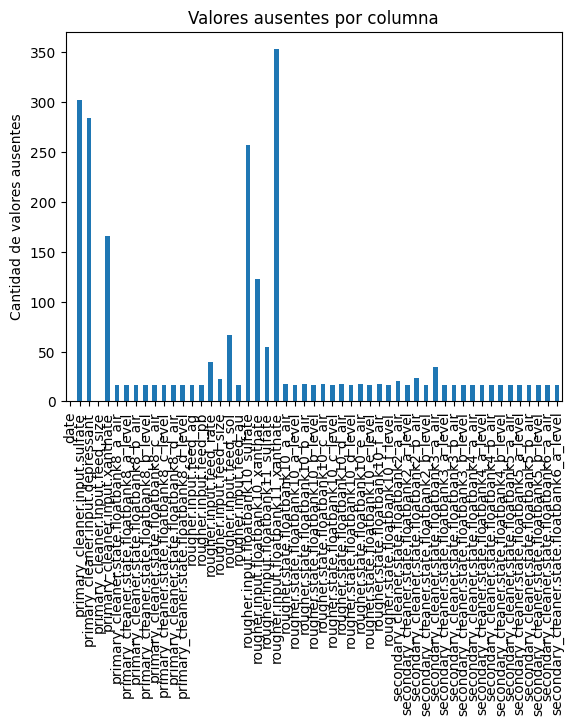


                                            Missing_Count  Missing_Percentage
rougher.input.floatbank11_xanthate                    353                6.03
primary_cleaner.input.sulfate                         302                5.16
primary_cleaner.input.depressant                      284                4.85
rougher.input.floatbank10_sulfate                     257                4.39
primary_cleaner.input.xanthate                        166                2.83
rougher.input.floatbank10_xanthate                    123                2.10
rougher.input.feed_sol                                 67                1.14
rougher.input.floatbank11_sulfate                      55                0.94
rougher.input.feed_rate                                40                0.68
secondary_cleaner.state.floatbank3_a_air               34                0.58
secondary_cleaner.state.floatbank2_b_air               23                0.39
rougher.input.feed_size                                22      

In [14]:
# Gráfico para encontrar valores ausentes
data_test.isna().sum().plot(kind='bar', title='Valores ausentes por columna')
plt.ylabel('Cantidad de valores ausentes')
plt.show()
print()

missing_info = pd.DataFrame({
    'Missing_Count': data_test.isna().sum(),
    'Missing_Percentage': (data_test.isna().sum() / len(data_test) * 100).round(2)
})

# Valores ausentes por columna y % de valores ausentes sobre el total de datos de la columna
print(missing_info.sort_values(by='Missing_Percentage', ascending=False))
print()

# Columnas con % valores ausentes mayor a 10%
print(f"{bold_start}Columnas con % valores ausentes mayor a 10%: {bold_end}")
print()
print(missing_info.query('Missing_Percentage > 10.0').sort_values(by='Missing_Percentage', ascending=False))
print()

In [15]:
# Crear copia del Dataframe original antes de eliminar valores ausentes
data_test_copy = data_test.copy()
data_test_copy_clean = data_test_copy.dropna()

# Revisar que no queden valores ausentes
missing_info = pd.DataFrame({
    'Missing_Count': data_test_copy_clean.isna().sum(),
    'Missing_Percentage': (data_test_copy_clean.isna().sum() / len(data_test_copy_clean) * 100).round(2)
})

# Valores ausentes por columna y % de valores ausentes sobre el total de datos de la columna
print(missing_info.sort_values(by='Missing_Percentage', ascending=False))
print()

# Columnas y filas del Dataframe sin valores ausentes
data_test_copy_clean.shape

                                            Missing_Count  Missing_Percentage
date                                                    0                 0.0
rougher.state.floatbank10_c_air                         0                 0.0
rougher.state.floatbank10_d_air                         0                 0.0
rougher.state.floatbank10_d_level                       0                 0.0
rougher.state.floatbank10_e_air                         0                 0.0
rougher.state.floatbank10_e_level                       0                 0.0
rougher.state.floatbank10_f_air                         0                 0.0
rougher.state.floatbank10_f_level                       0                 0.0
secondary_cleaner.state.floatbank2_a_air                0                 0.0
secondary_cleaner.state.floatbank2_a_level              0                 0.0
secondary_cleaner.state.floatbank2_b_air                0                 0.0
secondary_cleaner.state.floatbank2_b_level              0       

(5383, 53)

In [16]:
# Ceros por columna
zeros_info = pd.DataFrame({
    'Zeros_Count': (data_test_copy_clean == 0).sum(),
    'Zeros_Percentage': ((data_test_copy_clean == 0.0).sum() / len(data_test_copy_clean) * 100).round(2)
})
#print(zeros_info)
print(zeros_info.query('Zeros_Count > 0').sort_values(by='Zeros_Count', ascending=False).reset_index())

                    index  Zeros_Count  Zeros_Percentage
0   rougher.input.feed_ag           26              0.48
1   rougher.input.feed_pb           26              0.48
2  rougher.input.feed_sol           26              0.48
3   rougher.input.feed_au           26              0.48


In [17]:
columns_with_zero = zeros_info.query('Zeros_Count > 0').index.tolist()
#print(columns_with_zero)
mask = ~(data_test_copy_clean[columns_with_zero] == 0).any(axis=1)
data_test_no_zeros = data_test_copy_clean[mask]

# Ceros por columna
no_zeros_info = pd.DataFrame({
    'Zeros_Count': (data_test_no_zeros == 0).sum(),
    'Zeros_Percentage': ((data_test_no_zeros == 0).sum() / len(data_test_no_zeros) * 100).round(2)
})
#print(no_zeros_info.sort_values(by='Zeros_Count', ascending=False))
# Verificar que el Dataframe no tenga valores en cero
print(no_zeros_info.query('Zeros_Count > 0').sort_values(by='Zeros_Count', ascending=False).reset_index())
print()

# Columnas y filas del Dataframe sin valores en cero
print(f"{bold_start}Columnas y filas del Dataframe sin valores en cero:{bold_end}")
data_test_no_zeros.shape

Empty DataFrame
Columns: [index, Zeros_Count, Zeros_Percentage]
Index: []

Columnas y filas del Dataframe sin valores en cero:


(5357, 53)

In [18]:
# Revisar estructura del dataframe
data_test_no_zeros.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5357 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5357 non-null   object 
 1   primary_cleaner.input.sulfate               5357 non-null   float64
 2   primary_cleaner.input.depressant            5357 non-null   float64
 3   primary_cleaner.input.feed_size             5357 non-null   float64
 4   primary_cleaner.input.xanthate              5357 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5357 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5357 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5357 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5357 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5357 non-null   float64
 10  primary_clea

In [19]:
# Revisar estructura de los Dataframes
data_full.info(show_counts= True)
print()
print(f"{bold_start}El dataframe tiene este número de filas y columnas:{bold_end}")
data_full.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


(22716, 87)

In [20]:
# Revisar la existencia de duplicados en todo el dataframe y si hay fechas y horas repetidas en la columna 'date'
print(f"{bold_start}Número de valores duplicados:{bold_end}",data_full.duplicated().sum())
print(f"{bold_start}Fechas únicas:{bold_end}",data_full['date'].nunique())

Número de valores duplicados: 0
Fechas únicas: 22716


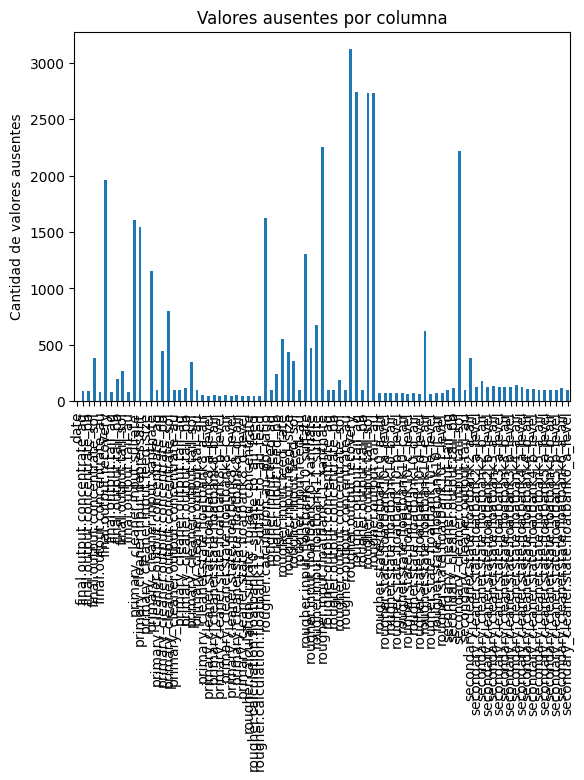


                                                    Missing_Count  \
rougher.output.recovery                                      3119   
rougher.output.tail_ag                                       2737   
rougher.output.tail_au                                       2736   
rougher.output.tail_sol                                      2736   
rougher.input.floatbank11_xanthate                           2257   
...                                                           ...   
primary_cleaner.state.floatbank8_d_level                       43   
rougher.calculation.sulfate_to_au_concentrate                  44   
rougher.calculation.floatbank11_sulfate_to_au_feed             44   
primary_cleaner.input.feed_size                                 0   
date                                                            0   

                                                    Missing_Percentage  
rougher.output.recovery                                          13.73  
rougher.output.tail_ag  

In [21]:
# Gráfico para encontrar valores ausentes
data_full.isna().sum().plot(kind='bar', title='Valores ausentes por columna')
plt.ylabel('Cantidad de valores ausentes')
plt.show()
print()

missing_info = pd.DataFrame({
    'Missing_Count': data_full.isna().sum(),
    'Missing_Percentage': (data_full.isna().sum() / len(data_full) * 100).round(2)
})

# Valores ausentes por columna y % de valores ausentes sobre el total de datos de la columna
print(missing_info.sort_values(by='Missing_Percentage', ascending=False))
print()

# Columnas con % valores ausentes mayor a 10%
print(f"{bold_start}Columnas con % valores ausentes mayor a 10%: {bold_end}")
print()
print(missing_info.query('Missing_Percentage > 10.0').sort_values(by='Missing_Percentage', ascending=False))
print()

In [22]:
# Crear copia del Dataframe original antes de eliminar valores ausentes
data_full_copy = data_full.copy()
data_full_copy_clean = data_full_copy.dropna()

# Revisar que no queden valores ausentes
missing_info = pd.DataFrame({
    'Missing_Count': data_full_copy_clean.isna().sum(),
    'Missing_Percentage': (data_full_copy_clean.isna().sum() / len(data_full_copy_clean) * 100).round(2)
})

# Valores ausentes por columna y % de valores ausentes sobre el total de datos de la columna
print(missing_info.sort_values(by='Missing_Percentage', ascending=False))
print()

# Columnas y filas del Dataframe sin valores ausentes
data_full_copy_clean.shape

                                            Missing_Count  Missing_Percentage
date                                                    0                 0.0
rougher.state.floatbank10_b_air                         0                 0.0
rougher.state.floatbank10_f_air                         0                 0.0
rougher.state.floatbank10_e_level                       0                 0.0
rougher.state.floatbank10_e_air                         0                 0.0
...                                                   ...                 ...
primary_cleaner.state.floatbank8_c_level                0                 0.0
primary_cleaner.state.floatbank8_c_air                  0                 0.0
primary_cleaner.state.floatbank8_b_level                0                 0.0
primary_cleaner.state.floatbank8_b_air                  0                 0.0
secondary_cleaner.state.floatbank6_a_level              0                 0.0

[87 rows x 2 columns]



(16094, 87)

In [23]:
# Ceros por columna
zeros_info = pd.DataFrame({
    'Zeros_Count': (data_full_copy_clean == 0).sum(),
    'Zeros_Percentage': ((data_full_copy_clean == 0.0).sum() / len(data_full_copy_clean) * 100).round(2)
})
#print(zeros_info)
print(zeros_info.query('Zeros_Count > 0').sort_values(by='Zeros_Count', ascending=False).reset_index())

                                       index  Zeros_Count  Zeros_Percentage
0           secondary_cleaner.output.tail_au          506              3.14
1          secondary_cleaner.output.tail_sol          506              3.14
2           secondary_cleaner.output.tail_pb          506              3.14
3           secondary_cleaner.output.tail_ag          506              3.14
4             rougher.output.concentrate_sol          301              1.87
5              rougher.output.concentrate_ag          301              1.87
6                    rougher.output.recovery          301              1.87
7              rougher.output.concentrate_au          301              1.87
8              rougher.output.concentrate_pb          301              1.87
9             primary_cleaner.output.tail_pb           99              0.62
10            primary_cleaner.output.tail_ag           99              0.62
11            primary_cleaner.output.tail_au           99              0.62
12          

In [24]:
columns_with_zero = zeros_info.query('Zeros_Count > 0').index.tolist()
#print(columns_with_zero)
mask = ~(data_full_copy_clean[columns_with_zero] == 0).any(axis=1)
data_full_no_zeros = data_full_copy_clean[mask]

# Ceros por columna
no_zeros_info = pd.DataFrame({
    'Zeros_Count': (data_full_no_zeros == 0).sum(),
    'Zeros_Percentage': ((data_full_no_zeros == 0).sum() / len(data_full_no_zeros) * 100).round(2)
})
#print(no_zeros_info.sort_values(by='Zeros_Count', ascending=False))
# Verificar que el Dataframe no tenga valores en cero
print(no_zeros_info.query('Zeros_Count > 0').sort_values(by='Zeros_Count', ascending=False).reset_index())
print()

# Columnas y filas del Dataframe sin valores en cero
print(f"{bold_start}Columnas y filas del Dataframe sin valores en cero:{bold_end}")
data_full_no_zeros.shape

Empty DataFrame
Columns: [index, Zeros_Count, Zeros_Percentage]
Index: []

Columnas y filas del Dataframe sin valores en cero:


(15071, 87)

In [25]:
# Revisar estructura del dataframe
data_full_no_zeros.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15071 entries, 0 to 22701
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                15071 non-null  object 
 1   final.output.concentrate_ag                         15071 non-null  float64
 2   final.output.concentrate_pb                         15071 non-null  float64
 3   final.output.concentrate_sol                        15071 non-null  float64
 4   final.output.concentrate_au                         15071 non-null  float64
 5   final.output.recovery                               15071 non-null  float64
 6   final.output.tail_ag                                15071 non-null  float64
 7   final.output.tail_pb                                15071 non-null  float64
 8   final.output.tail_sol                               15071 non-null  float64


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Se realiza el mismo tratamiento que se aplicó al df de entrenamiento para los df de prueba y fuente, eliminando los valores ausentes y en cero. 
Se toma esta decisión con base a que el porcentaje de valores ausentes y cero representan menos del 10%. Solamente 4 columnas del df fuente tenían porcentaje de valores ausentes entre el 12 % y 14 %. 

- El df de prueba paso de 5.856 a 5.357 filas.
- El df de fuente paso de 22.716 a 15.071 filas

</div>

In [26]:
# 1.2 Cálculo de recuperación

data_train_no_zeros['rougher.output.recovery.check'] = (
    (data_train_no_zeros['rougher.output.concentrate_au'] * 
     (data_train_no_zeros['rougher.input.feed_au'] - data_train_no_zeros['rougher.output.tail_au']) 
    ) / 
    (data_train_no_zeros['rougher.input.feed_au'] * 
     (data_train_no_zeros['rougher.output.concentrate_au'] - data_train_no_zeros['rougher.output.tail_au'])
    ) * 100
)

print(data_train_no_zeros[['rougher.output.recovery','rougher.output.recovery.check']])
print(data_train_no_zeros['rougher.output.recovery'].sum() )
print(data_train_no_zeros['rougher.output.recovery.check'].sum() )

       rougher.output.recovery  rougher.output.recovery.check
0                    87.107763                      87.107763
1                    86.843261                      86.843261
2                    86.842308                      86.842308
3                    87.226430                      87.226430
4                    86.688794                      86.688794
...                        ...                            ...
16841                90.384753                      90.384753
16842                88.478959                      88.478959
16843                87.793594                      87.793594
16844                90.466483                      90.466483
16845                90.577495                      90.577495

[10285 rows x 2 columns]
865503.7502104084
865503.7502104084


/tmp/ipykernel_603/1991825746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_no_zeros['rougher.output.recovery.check'] = (


<div class="alert alert-block alert-success"> <b>Celda [26]</b> <a class="tocSkip"></a><br> Muy buen trabajo al calcular de forma independiente la recuperación de oro con la fórmula y compararla con la columna original. La validación del resultado con un EAM prácticamente nulo muestra que entendiste y aplicaste correctamente el concepto. </div>

In [27]:
# 1.2 Cálculo del EAM 
print(mean_absolute_error(data_train_no_zeros['rougher.output.recovery'], data_train_no_zeros['rougher.output.recovery.check']))

9.61875207582681e-15


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Calculamos el Error Absoluto Medio entre la columna 'rougher.output.recovery' y el cálculo que hicimos mediante la fórmula de recuperación en la columna 'rougher.output.recovery.check'. 
- El EAM es del 9.61875207582681e-15 (prácticamente 0), por lo tanto, cada observación tiene un EAM de 9.61875207582681e-15 versus el valor real. 

</div>

In [28]:
# 1.3 Características no disponibles en el conjunto de prueba
missing_in_test = list(set(data_train_no_zeros.columns) - set(data_test_no_zeros.columns))
#print("Características ausentes en test:", missing_in_test)

print("\nTipos de datos:")
print(data_train_no_zeros[missing_in_test].dtypes)
print()
print(f"{bold_start}Cantidad de características ausentes en conjunto de prueba que están presentes en conjunto de entrenamiento:{bold_end}")
data_train_no_zeros[missing_in_test].dtypes.shape


Tipos de datos:
primary_cleaner.output.concentrate_au                 float64
rougher.calculation.floatbank10_sulfate_to_au_feed    float64
rougher.calculation.au_pb_ratio                       float64
rougher.output.tail_ag                                float64
rougher.output.concentrate_pb                         float64
final.output.recovery                                 float64
final.output.concentrate_au                           float64
primary_cleaner.output.concentrate_ag                 float64
primary_cleaner.output.concentrate_sol                float64
rougher.calculation.floatbank11_sulfate_to_au_feed    float64
primary_cleaner.output.tail_pb                        float64
rougher.output.concentrate_ag                         float64
rougher.output.recovery.check                         float64
rougher.output.tail_sol                               float64
final.output.concentrate_pb                           float64
rougher.output.tail_au                               

(35,)

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Son 35 características que no se encuentran en el df de prueba, la explicación se debe a que todas son resultados o calculos que se realizan con base en los inputs. El df de prueba solo tiene características de tipo input. 

</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>


__Conclusión paso 1. Preparar los datos:__
- Se analizaron los df y se realizó el preprocesamiento de los datos eliminando valores ausentes y en cero.
- Se verificó el cálculo de recuperación de la característica 'rougher.output.recovery' y mediante el EAM, podemos definir que está bien calculado.
- Se identificaron las características que no están presentes en el df de prueba y si en el df de entramiento. Todas son outputs, esta es la razón de porque no están presentes en el df de prueba.

</div>

In [29]:
# 2.1 Concentración de metales (Au = oro, Ag = plata, Pb = plomo) en la etapa de purificación
stage = {
    'rougher_input':'rougher.input.feed_',
    'rougher_output': 'rougher.output.concentrate_',
    'primary_cleaner_output': 'primary_cleaner.output.concentrate_',
    'secondary_cleaner_output': 'secondary_cleaner.output.tail_',
    'final_output': 'final.output.concentrate_'
}


metals = ['au', 'ag', 'pb']
results = pd.DataFrame(index=stage.keys(), columns=metals)

# Calcular promedios para cada etapa-metal
for stage, name in stage.items():
    for metal in metals:
        column = name + metal
        results.loc[stage, metal] = data_train_no_zeros[column].mean()

# Convertir a numérico
results = results.astype(float)
print(results)

                                 au         ag         pb
rougher_input              8.093497   8.765355   3.543103
rougher_output            20.143602  12.048920   7.758343
primary_cleaner_output    32.577744   8.475923   9.591575
secondary_cleaner_output   4.383331  14.789655   5.692516
final_output              44.218051   5.175718  10.207331


<div class="alert alert-block alert-success"> <b>Celda [29]</b> <a class="tocSkip"></a><br> Buen uso de estructuras como diccionarios para automatizar la comparación entre etapas de concentración y metales. Esto optimiza el código y demuestra habilidades intermedias de programación en Python orientadas al análisis. </div>

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,secondary_cleaner.output.tail_au,final.output.concentrate_au
count,10285.000000,10285.000000,10285.000000,10285.000000,10285.000000
mean,8.093497,20.143602,32.577744,4.383331,44.218051
var,3.158736,5.479982,23.187325,4.404554,11.594273
std,1.777283,2.340936,4.815322,2.098703,3.405036
median,7.841886,20.282187,33.038219,4.005816,44.764688
min,1.265676,1.889855,0.010000,0.040478,7.198318
Q1 (25%),6.804280,18.923572,30.769011,3.248588,43.216792
Q3 (75%),9.257080,21.662943,35.204681,4.903628,46.042235
max,13.079582,28.146838,45.933934,26.811643,51.571885


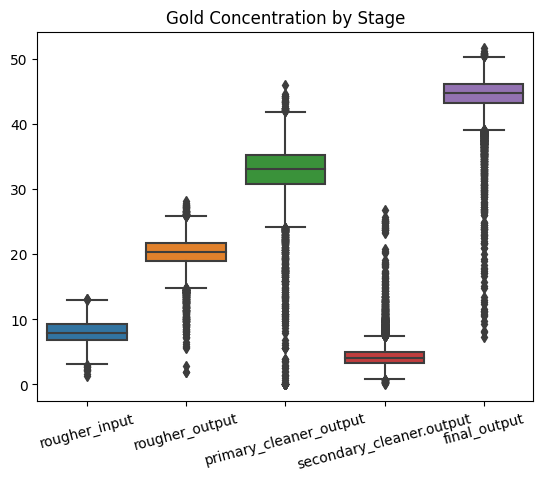

In [30]:
# Análisis concentración del Oro
sns.boxplot(data=[data_train_no_zeros['rougher.input.feed_au'],data_train_no_zeros['rougher.output.concentrate_au'],
                  data_train_no_zeros['primary_cleaner.output.concentrate_au'],data_train_no_zeros['secondary_cleaner.output.tail_au'],data_train_no_zeros['final.output.concentrate_au']] )
plt.xticks([0, 1,2,3,4], ['rougher_input', 'rougher_output','primary_cleaner_output','secondary_cleaner.output','final_output'],rotation=15)
plt.title('Gold Concentration by Stage')
print()

# Estadísticas descriptivas del Oro por etapa
def custom_describe(series):
    stats = series.agg([
        'count',
        'mean',
        'var',       
        'std',       
        'median',    
        'min',
        lambda x: x.quantile(0.25),  
        lambda x: x.quantile(0.75),  
        'max'
    ])
    stats.index = [
        'count',
        'mean',
        'var',       
        'std',       
        'median',    
        'min',
        'Q1 (25%)', 
        'Q3 (75%)', 
        'max'
    ]
    return stats


summary = data_train_no_zeros[[
    'rougher.input.feed_au',
    'rougher.output.concentrate_au',
    'primary_cleaner.output.concentrate_au',
    'secondary_cleaner.output.tail_au',
    'final.output.concentrate_au'
]].apply(custom_describe)

summary_table = summary
summary_table

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,secondary_cleaner.output.tail_ag,final.output.concentrate_ag
count,10285.000000,10285.000000,10285.000000,10285.000000,10285.000000
mean,8.765355,12.048920,8.475923,14.789655,5.175718
var,3.538286,4.592873,3.255685,9.120899,1.747826
std,1.881033,2.143099,1.804352,3.020083,1.322054
median,8.356909,11.835451,8.433071,14.991355,5.010854
min,1.226494,0.905993,0.010000,0.167573,0.646987
Q1 (25%),7.234586,10.500831,7.388063,12.310404,4.237531
Q3 (75%),10.160292,13.518103,9.700898,17.039656,5.856888
max,14.596026,21.725695,15.005789,23.264738,16.001945


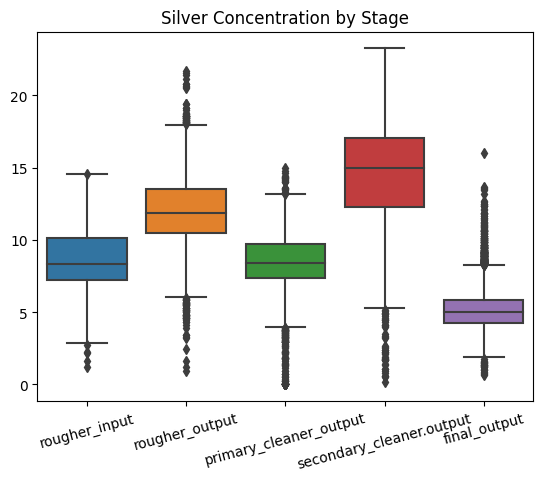

In [31]:
# Análisis concentración de la Plata
sns.boxplot(data=[data_train_no_zeros['rougher.input.feed_ag'],data_train_no_zeros['rougher.output.concentrate_ag'],
                  data_train_no_zeros['primary_cleaner.output.concentrate_ag'],data_train_no_zeros['secondary_cleaner.output.tail_ag'],data_train_no_zeros['final.output.concentrate_ag']] )
plt.xticks([0, 1,2,3,4], ['rougher_input', 'rougher_output','primary_cleaner_output','secondary_cleaner.output','final_output'],rotation=15)
plt.title('Silver Concentration by Stage')
print()

# Estadísticas descriptivas del Oro por etapa
def custom_describe(series):
    stats = series.agg([
        'count',
        'mean',
        'var',       
        'std',       
        'median',    
        'min',
        lambda x: x.quantile(0.25),  
        lambda x: x.quantile(0.75),  
        'max'
    ])
    stats.index = [
        'count',
        'mean',
        'var',       
        'std',       
        'median',    
        'min',
        'Q1 (25%)', 
        'Q3 (75%)', 
        'max'
    ]
    return stats


summary = data_train_no_zeros[[
    'rougher.input.feed_ag',
    'rougher.output.concentrate_ag',
    'primary_cleaner.output.concentrate_ag',
    'secondary_cleaner.output.tail_ag',
    'final.output.concentrate_ag'
]].apply(custom_describe)

summary_table = summary
summary_table

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,secondary_cleaner.output.tail_pb,final.output.concentrate_pb
count,10285.000000,10285.000000,10285.000000,10285.000000,10285.000000
mean,3.543103,7.758343,9.591575,5.692516,10.207331
var,1.139538,1.862999,6.103719,5.353390,2.250605
std,1.067491,1.364917,2.470571,2.313739,1.500202
median,3.421640,7.730460,9.919149,5.186038,10.347149
min,0.157686,0.629964,0.010000,0.065370,1.568047
Q1 (25%),2.791520,6.873570,8.321190,4.010347,9.277958
Q3 (75%),4.263634,8.578575,11.208383,7.306735,11.207681
max,7.142594,12.702148,17.081278,17.042505,17.031899


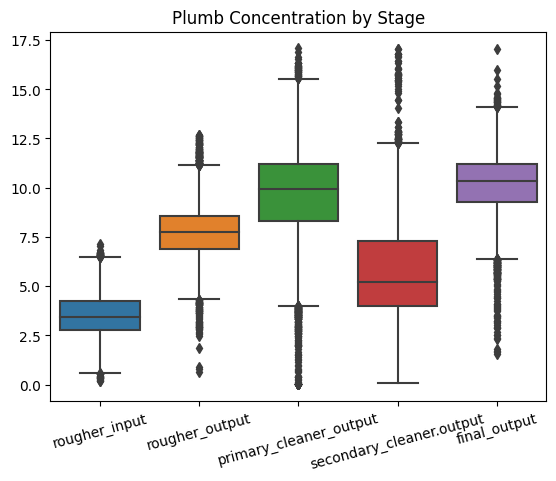

In [32]:
# Análisis concentración de la Plomo
sns.boxplot(data=[data_train_no_zeros['rougher.input.feed_pb'],data_train_no_zeros['rougher.output.concentrate_pb'],
                  data_train_no_zeros['primary_cleaner.output.concentrate_pb'],data_train_no_zeros['secondary_cleaner.output.tail_pb'],data_train_no_zeros['final.output.concentrate_pb']] )
plt.xticks([0, 1,2,3,4], ['rougher_input', 'rougher_output','primary_cleaner_output','secondary_cleaner.output','final_output'],rotation=15)
plt.title('Plumb Concentration by Stage')
print()

# Estadísticas descriptivas del Plomo por etapa
def custom_describe(series):
    stats = series.agg([
        'count',
        'mean',
        'var',       
        'std',       
        'median',    
        'min',
        lambda x: x.quantile(0.25),  
        lambda x: x.quantile(0.75),  
        'max'
    ])
    stats.index = [
        'count',
        'mean',
        'var',       
        'std',       
        'median',    
        'min',
        'Q1 (25%)', 
        'Q3 (75%)', 
        'max'
    ]
    return stats


summary = data_train_no_zeros[[
    'rougher.input.feed_pb',
    'rougher.output.concentrate_pb',
    'primary_cleaner.output.concentrate_pb',
    'secondary_cleaner.output.tail_pb',
    'final.output.concentrate_pb'
]].apply(custom_describe)

summary_table = summary
summary_table

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Después de analizar la concentración del Oro, Plata y Plomo en las diferentes etapas se observa:
- La concentración del Oro aumenta, este es el objetivo principal del proceso
- La concentración de la Plata disminuye debido a que, según el proceso de extracción del Oro, en los procesos de purificación la Plata se va perdiendo en los desechos del proceso. Por esta razón vemos que la concentración de este metal aumenta en la etapa Secondary Cleaner Output Tail. 
- La concentración de Plomo aumenta como la del Oro, ya que tiene un rol importante como colector del oro en la fundición y se recupera en la flotación. 
No soy experto, pero es lo que logro entender sobre el proceso y los datos de concentración respaldan está teoría del proceso. 


</div>

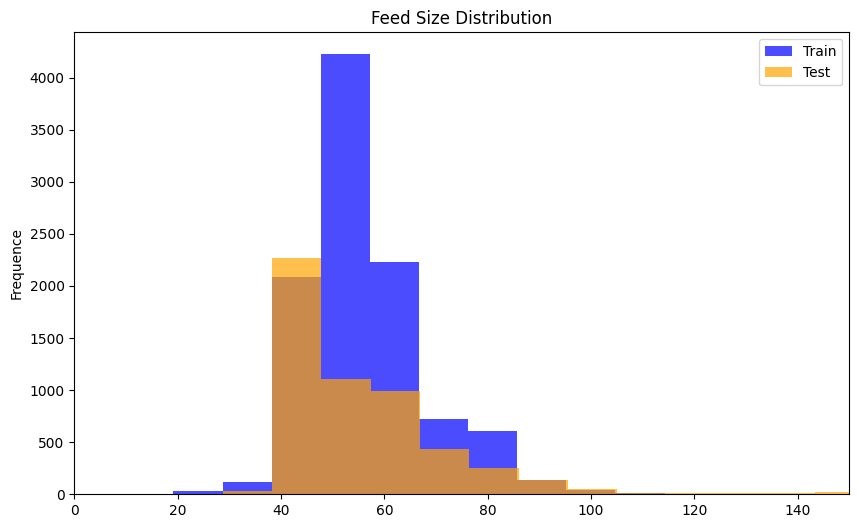

In [33]:
# 2.2 Comparación distirbuciones tamaño de particulas en entrenamiento y prueba
plt.figure(figsize=(10, 6))

train_feed_size =  data_train_no_zeros['rougher.input.feed_size']
test_feed_size = data_test_no_zeros['rougher.input.feed_size']

plt.hist(train_feed_size, bins=50, alpha=0.7, label='Train', color='blue')
plt.hist(test_feed_size, bins=50, alpha=0.7, label='Test', color='orange')

plt.title('Feed Size Distribution')
plt.xlabel('')
plt.ylabel('Frequence')
plt.legend()
plt.xlim(0, 150)

plt.show()

([<matplotlib.axis.XTick at 0x7f10ec3c1160>,
 [Text(0, 0, 'Train'), Text(1, 0, 'Test')])

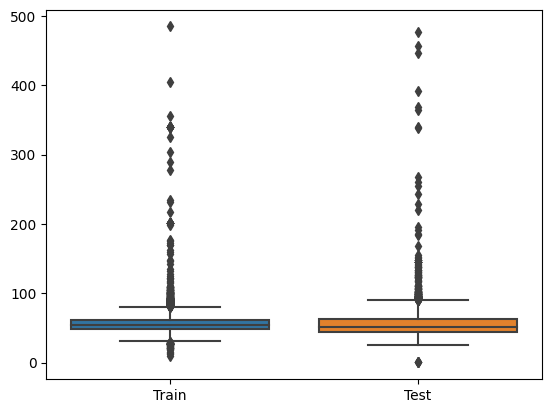

In [34]:
sns.boxplot(data=[train_feed_size, test_feed_size])
plt.xticks([0, 1], ['Train', 'Test'])

In [35]:
data_train_no_zeros['rougher.input.feed_size'].describe()

count    10285.000000
mean        57.315681
std         19.239640
min          9.659576
25%         48.598147
50%         54.092813
75%         61.475801
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [36]:
data_test_no_zeros['rougher.input.feed_size'].describe()

count    5357.000000
mean       56.370262
std        21.870267
min         0.046369
25%        43.914817
50%        51.010784
75%        62.398771
max       477.445473
Name: rougher.input.feed_size, dtype: float64

In [37]:
variance_train = np.var(train_feed_size)
print(f"{bold_start}Rougher Input Feed Size Train Variance:{bold_end}", variance_train)
variance_test = np.var(test_feed_size)
print(f"{bold_start}Rougher Input Feed Size Test Variance:{bold_end}",variance_test)

Rougher Input Feed Size Train Variance: 370.1277731181078
Rougher Input Feed Size Test Variance: 478.21929864913943


In [38]:
# Prueba las hipótesis
# H0: μ_Train-Test = μ_Others (no hay diferencia en la distribución)
# H1: μ_Train-Test ≠ μ_Others (hay diferencia)
alpha = 0.05

results = st.ttest_ind(train_feed_size, test_feed_size, equal_var=False) 

print('valor p:',results.pvalue) 

if results.pvalue < alpha: 
    print(f"{bold_start}Rechazamos H0: hay diferencia significativa.{bold_end}")
else:
    print(f"{bold_start}No rechazamos H0: no hay evidencia de diferencia.{bold_end}")

valor p: 0.0075731383092126365
Rechazamos H0: hay diferencia significativa.


<div class="alert alert-block alert-success"> <b>Celda [38]</b> <a class="tocSkip"></a><br> Aplicaste correctamente una prueba t de hipótesis para comparar la distribución del tamaño de partícula entre entrenamiento y prueba. Además, verificaste los supuestos con visualización, y eso da solidez a tu análisis. ¡Muy bien! </div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Las distribución del Feed Size no varian significativamente.
Aunque la varianza del conjunto de prueba es superior a la del conjunto de entrenamiento, la mediana de los dos conjuntos es cercana y la distribución es similar como se observa en el histograma. 

</div>

In [39]:
# 2.3 Concentraciones totales de las sustancias
stage = {
    'rougher_input_feed': 'rougher.input.feed_',
    'rougher_output': 'rougher.output.concentrate_',
    'final_output': 'final.output.concentrate_'
}

metals = ['au', 'ag', 'pb', 'sol']
results = pd.DataFrame(index=stage.keys(), columns=metals)

# Calcular promedios para cada etapa-metal
for stage, name in stage.items():
    for metal in metals:
        column = name + metal
        results.loc[stage, metal] = data_train_no_zeros[column].mean()

# Convertir a numérico
results = results.astype(float)
print(results)

                           au         ag         pb        sol
rougher_input_feed   8.093497   8.765355   3.543103  36.542462
rougher_output      20.143602  12.048920   7.758343  29.185145
final_output        44.218051   5.175718  10.207331   9.605246


<AxesSubplot:>

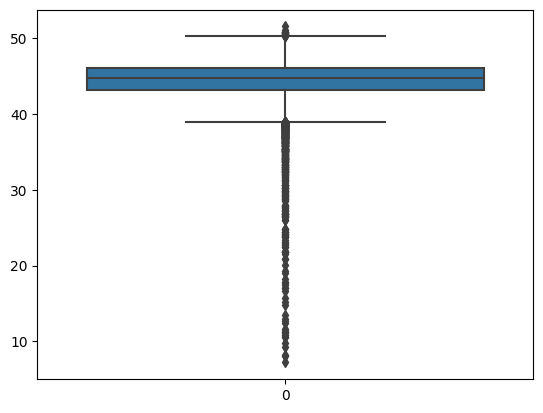

In [40]:
# Distribución del Oro Final Output
sns.boxplot(data=data_train_no_zeros['final.output.concentrate_au'])

In [41]:
# Desviación Standar del Oro
std_desv_Au_final_concentration_output = data_train_no_zeros['final.output.concentrate_au'].std()
print(f"{bold_start}Desviación Standar del Oro Final Concentrate:{bold_end}", std_desv_Au_final_concentration_output)

Desviación Standar del Oro Final Concentrate: 3.405036427265812


In [42]:
lower_limit = data_train_no_zeros['final.output.concentrate_au'].mean() - 2 * std_desv_Au_final_concentration_output
upper_limit = data_train_no_zeros['final.output.concentrate_au'].mean() + 2 * std_desv_Au_final_concentration_output
print(lower_limit)
print(upper_limit)

37.40797851525815
51.0281242243214


In [43]:
filtered_train_data = ((data_train_no_zeros['final.output.concentrate_au']>=lower_limit ) & (data_train_no_zeros['final.output.concentrate_au']<=upper_limit))
#print(data_train_no_zeros[filtered_train_data])
print(f"{bold_start}El dataframe tiene este número de filas y columnas:{bold_end}")
data_train_no_zeros[filtered_train_data].shape

El dataframe tiene este número de filas y columnas:


(9967, 88)

<div class="alert alert-block alert-warning"> <b>Celda [43]</b> <a class="tocSkip"></a><br> Aplicaste un filtro para excluir valores fuera de 2 desviaciones estándar, lo cual puede ser válido. Sin embargo, este tipo de filtrado puede eliminar información relevante si no se justifica como outlier estadístico o error de medición. Considera incluir un histograma para visualizar el impacto de este filtrado o realizar un análisis de sensibilidad. </div>

<AxesSubplot:>

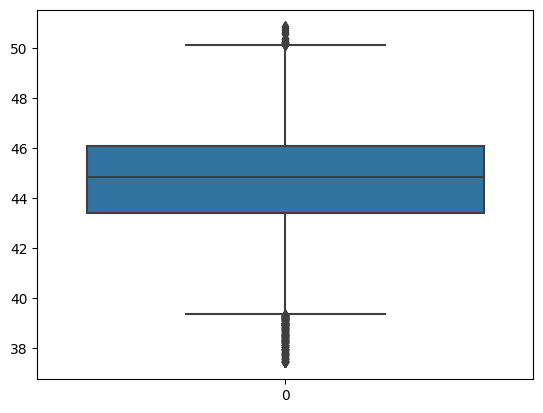

In [44]:
sns.boxplot(data = data_train_no_zeros[filtered_train_data]['final.output.concentrate_au'])

In [45]:
# Estadísticas descriptivas 
def custom_describe(series):
    stats = series.agg([
        'count',
        'mean',
        'var',       
        'std',       
        'median',    
        'min',
        lambda x: x.quantile(0.25),  
        lambda x: x.quantile(0.75),  
        'max'
    ])
    stats.index = [
        'count',
        'mean',
        'var',       
        'std',       
        'median',    
        'min',
        'Q1 (25%)', 
        'Q3 (75%)', 
        'max'
    ]
    return stats


summary = data_train_no_zeros[filtered_train_data][[
    'rougher.input.feed_au',
    'rougher.output.concentrate_au',
    'final.output.concentrate_au'
]].apply(custom_describe)

summary_table = summary
summary_table

,rougher.input.feed_au,rougher.output.concentrate_au,final.output.concentrate_au
count,9967.000000,9967.000000,9967.000000
mean,8.119213,20.220277,44.628198
var,3.100738,4.941572,4.870631
std,1.760891,2.222965,2.206951
median,7.862869,20.313636,44.841162
min,1.582417,2.851655,37.429098
Q1 (25%),6.828088,18.997298,43.394919
Q3 (75%),9.284896,21.686048,46.089223
max,13.076836,28.146838,50.880233


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

1. La desviación estandar del Oro en la fase final es de 3.405036427265812.
2. Ajustamos límite inferior y superior multiplicando por 2 veces la desviación estandar.
3. Filtramos el df de entrenamiento.
4. La eliminación de estos valores permite que la varianza del Oro en las 3 fases mejore, especialmente en la Final Output Concentrate pasando de 11.594273 a 4.870631. 

</div>

In [46]:
#data_train_no_zeros[filtered_train_data].info(show_counts= True)

columnas_df1 = set(data_train_no_zeros[filtered_train_data].columns)
columnas_df2 = set(data_test_no_zeros.columns)

# 2. Encontrar columnas faltantes
faltantes_en_df2 = list(columnas_df1 - columnas_df2) + ['date']
print(faltantes_en_df2)

['primary_cleaner.output.concentrate_au', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.tail_ag', 'rougher.output.concentrate_pb', 'final.output.recovery', 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_sol', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'primary_cleaner.output.tail_pb', 'rougher.output.concentrate_ag', 'rougher.output.recovery.check', 'rougher.output.tail_sol', 'final.output.concentrate_pb', 'rougher.output.tail_au', 'primary_cleaner.output.tail_ag', 'final.output.concentrate_sol', 'final.output.tail_pb', 'final.output.tail_ag', 'final.output.tail_au', 'primary_cleaner.output.tail_sol', 'rougher.output.recovery', 'primary_cleaner.output.concentrate_pb', 'rougher.output.tail_pb', 'secondary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'secondary_cleaner.output.tail_sol', 'secondary

In [47]:
# 3. Construir Modelo
# Regresión Lineal
target = data_train_no_zeros[filtered_train_data][['rougher.output.recovery','final.output.recovery']]
features = data_train_no_zeros[filtered_train_data].drop(columns=faltantes_en_df2)
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

#Crear copias para evitar la alerta SettingWithCopyWarning
features_train = features_train.copy()
features_valid = features_valid.copy()

#target_train.shape
#features_train.shape

<div class="alert alert-block alert-warning"> <b>Celda [47]</b> <a class="tocSkip"></a><br> Al separar las variables objetivo, es una buena práctica verificar si tienen correlación significativa. Si la correlación entre `rougher.output.recovery` y `final.output.recovery` es baja, usar un modelo multisalida como hiciste está bien; si es alta, podrías intentar predecir una con base en la otra para mejorar la eficiencia del modelo. </div>

In [48]:
# Entrenar modelo de regresión logistica
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

In [49]:
#scores = cross_val_score(model, features, target, cv=5)
#final_score = sum(scores) / len(scores)
final_score = cross_val_score(model, features, target, cv=5).mean()
print('Puntuación media de la evaluación del modelo:', final_score)

Puntuación media de la evaluación del modelo: -0.46491660417406083


<div class="alert alert-block alert-warning"> <b>Celda [49]</b> <a class="tocSkip"></a><br> La métrica de validación cruzada con regresión lineal resulta negativa, lo cual puede indicar que el modelo está sobreajustando en algunas particiones. Podrías probar con `scoring='neg_root_mean_squared_error'` en `cross_val_score` para observar mejor la magnitud del error y facilitar su interpretación. </div>

In [50]:
mse = mean_squared_error(target_valid, predicted_valid)
r2 = r2_score(target_valid, predicted_valid)
print("MSE:", mse)
rmse = mse **0.5
print('RMSE:', rmse)

MSE: 28.049426227920918
RMSE: 5.2961709024464945


In [51]:
target_rougher = target_train['rougher.output.recovery']
target_final = target_train['final.output.recovery']
prediction_rougher = pd.Series([element[0] for element in predicted_valid])
prediction_final = pd.Series([element[1] for element in predicted_valid])

def calcular_sWAPE (target_rougher, prediction_rougher, target_final, prediction_final):
    sWAPE_rougher = ((abs(target_rougher - prediction_rougher)) /
                     ((abs(target_rougher) + abs(prediction_rougher))/2)) * 100
    
    sWAPE_final = ((abs(target_final - prediction_final)) /
                   ((abs(target_final) + abs(prediction_final))/2)) * 100

    sWAPE_total = 0.25 * sWAPE_rougher + 0.75 * sWAPE_final

    return sWAPE_total
    
resultado_sWAPE = calcular_sWAPE(
    target_rougher = target_rougher,
    prediction_rougher = prediction_rougher,
    target_final = target_final,
    prediction_final = prediction_final
)

sWAPE_promedio = resultado_sWAPE.mean()
print(sWAPE_promedio)


9.235648768773276


In [52]:
dummy = DummyRegressor(strategy="mean").fit(features_train, target_train)
dummy_mse = mean_squared_error(target_valid, dummy.predict(features_valid))
print("MSE modelo naive:", dummy_mse)
rmse = dummy_mse **0.5
print("RMSE modelo naive:",rmse)

scores = cross_val_score(dummy, features, target, cv=5)
final_score = sum(scores) / len(scores)
print('Puntuación media de la evaluación del modelo:', final_score)

MSE modelo naive: 55.8666354133902
RMSE modelo naive: 7.474398665671386
Puntuación media de la evaluación del modelo: -0.7033417339444066


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Modelo Regresión lineal:
- Las predicciones se desvián de los valores reales en un 5.3 unidades (RSME).
- El sMAPE de este modelo indica un error porcentual simétrico promedio del 9.24% en la predicción de recuperación de mineral. Esto significa que las predicciones se desvían en promedio un 9.24% del valor real, considerando la importancia relativa de las etapas Rougher (25%) y Final (75%). Este resultado de sMAPE se considera bueno/aceptable. 
- Podemos concluir que este modelo es útil, no perfecto, ya que tiene un MSE y un RMSE mejor que el regresor Dummy. 

</div>

In [53]:
# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
mse = mean_squared_error(target_valid, predicted_valid)
r2 = r2_score(target_valid, predicted_valid)
print("MSE:", mse)
rmse = mse **0.5
print("RMSE:",rmse)

scores = cross_val_score(model, features, target, cv=5)
final_score = sum(scores) / len(scores)
print('Puntuación media de la evaluación del modelo:', final_score)
#print('Accuracy:', accuracy(target_valid, predicted_valid))

MSE: 15.226382023762618
RMSE: 3.9020996942367603
Puntuación media de la evaluación del modelo: -0.4576603102311087


<div class="alert alert-block alert-success"> <b>Celda [53]</b> <a class="tocSkip"></a><br> Muy bien el entrenamiento con Random Forest y comparación con regresión lineal. Además, incluiste métricas de evaluación consistentes como RMSE y sMAPE. Este contraste refuerza tu análisis y muestra un enfoque adecuado hacia modelos de mejor desempeño. </div>

In [54]:
target_rougher = target_train['rougher.output.recovery']
target_final = target_train['final.output.recovery']
prediction_rougher = pd.Series([element[0] for element in predicted_valid])
prediction_final = pd.Series([element[1] for element in predicted_valid])

def calcular_sWAPE (target_rougher, prediction_rougher, target_final, prediction_final):
    sWAPE_rougher = ((abs(target_rougher - prediction_rougher)) /
                     ((abs(target_rougher) + abs(prediction_rougher))/2)) * 100
    
    sWAPE_final = ((abs(target_final - prediction_final)) /
                   ((abs(target_final) + abs(prediction_final))/2)) * 100

    sWAPE_total = 0.25 * sWAPE_rougher + 0.75 * sWAPE_final

    return sWAPE_total
    
resultado_sWAPE = calcular_sWAPE(
    target_rougher = target_rougher,
    prediction_rougher = prediction_rougher,
    target_final = target_final,
    prediction_final = prediction_final
)

sWAPE_promedio = resultado_sWAPE.mean()
print(sWAPE_promedio)


9.833772731857724


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Modelo Regresión Random Forest:
- Las predicciones se desvián de los valores reales en un 3.8 unidades (RSME).
- El sMAPE de este modelo indica un error porcentual simétrico promedio del 9.8% en la predicción de recuperación de mineral. Esto significa que las predicciones se desvían en promedio un 9.8% del valor real, considerando la importancia relativa de las etapas Rougher (25%) y Final (75%). Este resultado de sMAPE se considera bueno/aceptable.
- Este modelo es mejor que la regresión lineal. 

</div>

In [55]:
# Traer del df FULL las columnas Recovery (target) para el df de PRUEBA ma través de la columna 'date'
columnas_a_traer = ['date','rougher.output.recovery', 'final.output.recovery']  # Reemplaza con tus nombres reales
data_full_subset = data_full[columnas_a_traer]

# Left Join
data_test_final = pd.merge(
    left=data_test_no_zeros,
    right=data_full_subset,
    on='date',          # Columna común
    how='left'          # Mantiene todos los registros de df1
)

# Verificar que el df de Prueba tenga las dos columnas
data_test_final.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5357 entries, 0 to 5356
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5357 non-null   object 
 1   primary_cleaner.input.sulfate               5357 non-null   float64
 2   primary_cleaner.input.depressant            5357 non-null   float64
 3   primary_cleaner.input.feed_size             5357 non-null   float64
 4   primary_cleaner.input.xanthate              5357 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5357 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5357 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5357 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5357 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5357 non-null   float64
 10  primary_clea

In [56]:
# Remplazar con la mediana los valores faltantes en las columnas de Recovery

# Reemplazamos valores en 0 por NaN para que no afecten mediana
data_test_final['rougher.output.recovery'] = data_test_final['rougher.output.recovery'].replace(0, np.nan)
#data_test_final['rougher.output.recovery'].describe()
data_test_final['rougher.output.recovery'] = data_test_final['rougher.output.recovery'].fillna(data_test_final['rougher.output.recovery'].median())

# Reemplazamos valores en 0 por NaN para que no afecten mediana
data_test_final['final.output.recovery'] = data_test_final['final.output.recovery'].replace(0, np.nan)
#data_test_final['final.output.recovery'].describe()
data_test_final['final.output.recovery'] = data_test_final['final.output.recovery'].fillna(data_test_final['final.output.recovery'].median())

#df_filtered = data_test_final[data_test_final['rougher.output.recovery'].isna()]
#print(df_filtered)

# Después de reemplazar con la mediana no tenemos ni valores en 0 ni ausentes en las columnas Recovery. 
data_test_final.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5357 entries, 0 to 5356
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5357 non-null   object 
 1   primary_cleaner.input.sulfate               5357 non-null   float64
 2   primary_cleaner.input.depressant            5357 non-null   float64
 3   primary_cleaner.input.feed_size             5357 non-null   float64
 4   primary_cleaner.input.xanthate              5357 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5357 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5357 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5357 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5357 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5357 non-null   float64
 10  primary_clea

<div class="alert alert-block alert-success"> <b>Celda [56]</b> <a class="tocSkip"></a><br> Excelente decisión al reemplazar los valores en cero por `NaN` antes de imputar con la mediana. Esta práctica garantiza que no estás distorsionando la distribución al asumir que 0 es un valor válido en este contexto. ¡Buen criterio! </div>

In [57]:
target_test = data_test_final[['rougher.output.recovery','final.output.recovery']]
features_test = data_test_final.drop(['rougher.output.recovery','final.output.recovery','date'], axis=1 )

model = RandomForestRegressor(n_estimators=100)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
mse = mean_squared_error(target_test, predicted_test)
r2 = r2_score(target_test, predicted_test)
print("MSE:", mse)
rmse = mse **0.5
print("RMSE:",rmse)

scores = cross_val_score(model, features, target, cv=5)
final_score = sum(scores) / len(scores)
print('Puntuación media de la evaluación del modelo:', final_score)

MSE: 61.68235356994123
RMSE: 7.853811404021695
Puntuación media de la evaluación del modelo: -0.520210679482429


In [58]:
#print(target_test)

In [59]:
#print(predicted_test)

In [60]:
#[element[0] for element in predicted_test]
#[element[1] for element in predicted_test]

In [61]:
target_rougher = target_test['rougher.output.recovery']
target_final = target_test['final.output.recovery']
prediction_rougher = pd.Series([element[0] for element in predicted_test])
prediction_final = pd.Series([element[1] for element in predicted_test])

def calcular_sWAPE (target_rougher, prediction_rougher, target_final, prediction_final):
    sWAPE_rougher = ((abs(target_rougher - prediction_rougher)) /
                     ((abs(target_rougher) + abs(prediction_rougher))/2)) * 100
    
    sWAPE_final = ((abs(target_final - prediction_final)) /
                   ((abs(target_final) + abs(prediction_final))/2)) * 100

    sWAPE_total = 0.25 * sWAPE_rougher + 0.75 * sWAPE_final

    return sWAPE_total
    
resultado_sWAPE = calcular_sWAPE(
    target_rougher = target_rougher,
    prediction_rougher = prediction_rougher,
    target_final = target_final,
    prediction_final = prediction_final
)

sWAPE_promedio = resultado_sWAPE.mean()
print(sWAPE_promedio)


8.954464661753955


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

Utilizamos el df de prueba con el Modelo Regresión Random Forest:
- Las predicciones se desvián de los valores reales en un 7.8 unidades (RSME).
- El sMAPE de este modelo indica un error porcentual simétrico promedio del 8.9% en la predicción de recuperación de mineral. Esto significa que las predicciones se desvían en promedio un 8.9% del valor real, considerando la importancia relativa de las etapas Rougher (25%) y Final (75%). Este resultado de sMAPE se considera bueno/aceptable.
- El sMAPE es mejor cuando utilizamos el modelo de prueba. 

</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class="tocSkip"></a>

No sé porqué la validación cruzada me negativa en los modelos y los demás indicadores son aceptables. 
Agradezco tu ayuda por favor. 

</div>

<div class="alert alert-block alert-warning"> <b>Comentario sobre validación cruzada</b> <a class="tocSkip"></a><br> ¡Gracias por tu pregunta! El valor negativo en la validación cruzada probablemente se deba a que `cross_val_score` está utilizando por defecto la métrica de `scoring='r2'` para modelos de regresión. En esta métrica, un resultado negativo significa que el modelo tiene un rendimiento **peor que un modelo constante (dummy)** que predice simplemente el valor medio. Esto puede ocurrir, por ejemplo, si el modelo tiene bajo desempeño en alguno de los pliegues o si hay sobreajuste en el conjunto completo de entrenamiento.<br><br>
Para interpretaciones más claras y consistentes con tus otras métricas (RMSE, sMAPE), te sugiero usar explícitamente una métrica más interpretable como el sMAPE dentro de la validación cruzada.
Esto te permitirá evaluar el error promedio de forma coherente con las demás métricas de tu análisis.
    

    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    import numpy as np
    
    # 1. Función sMAPE personalizada (versión vectorizada para arrays)
    def smape(y_true, y_pred):
        denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
        diff = np.abs(y_true - y_pred) / denominator
        diff[denominator == 0] = 0.0  # evitar divisiones por cero
        return np.mean(diff) * 100
    
    # 2. Crear el scorer compatible con sklearn
    smape_scorer = make_scorer(smape, greater_is_better=False)
    
    # 3. Validación cruzada usando sMAPE como métrica
    scores = cross_val_score(model, features, target, cv=5, scoring=smape_scorer)
    
    # 4. Mostrar el sMAPE promedio (convertimos signo porque scikit-learn invierte los errores)
    print("sMAPE promedio validación cruzada:", -scores.mean())



</div>

<div class="alert alert-block alert-success"> <b>Comentario final</b> <a class="tocSkip"></a><br> ¡Muy buen trabajo, Daniel! 
    
A lo largo del proyecto mostraste fortalezas muy claras:<br><br>

• Aplicaste una limpieza de datos sistemática y documentada para los tres conjuntos de datos.<br> 
• Identificaste adecuadamente valores ausentes y en cero, justificando tus decisiones.<br> 
• Verificaste la fórmula de recuperación usando EAM, mostrando comprensión del dominio.<br> 
• Utilizaste estructuras eficientes como diccionarios para iteraciones.<br> 
• Implementaste y explicaste pruebas estadísticas con rigor.<br> 
• Incluiste visualizaciones que complementan el análisis de distribución.<br> 
• Aplicaste técnicas de modelado con múltiples métricas de evaluación.<br> 
• Comparaste correctamente modelos base y avanzados.<br> 
• Mostraste preocupación por evitar data leakage al identificar características no presentes en test.<br> • Incluiste comentarios reflexivos que evidencian pensamiento crítico.<br><br> 

❗ ¿Qué podría mejorar?

• Ajustar el scoring en la validación cruzada para que sea coherente con las otras métricas.

• Automatizar más el análisis de outliers o justificar por qué se eliminan según la desviación estándar.

• Ninguno de estos puntos compromete la validez del análisis ni los resultados obtenidos.


¡Felicidades! </div>